<a href="https://colab.research.google.com/github/Paarthaenon/Adv.-ML-Public-Repo/blob/master/Advanced_ML_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Machine Learning HW#2 - Paarth Malkan

In [0]:
import sys
import time
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications  import VGG19, ResNet50, InceptionV3

from keras.preprocessing import image
from keras.preprocessing.image import load_img
from PIL import Image
from itertools import repeat
from keras.regularizers import l2
from keras.layers import Dense, Activation, Dropout,BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint

import keras2onnx
from keras2onnx import convert_keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [2]:
# Unpacking zipped brain images
!unzip brain_tumor_dataset.zip  

Archive:  brain_tumor_dataset.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace brain_tumor_dataset/no/10 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace brain_tumor_dataset/no/11 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]
error:  invalid response [[n]]
replace brain_tumor_dataset/no/11 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace brain_tumor_dataset/no/12 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
# Extracting filenames 

file_path = 'brain_tumor_dataset'
categories = ['yes', 'no']
f_names = []

for category in categories:
  image_folder = os.path.join(file_path, category)
  file_names = os.listdir(image_folder)
  full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
  f_names.append(full_path)

print ([len(f) for f in f_names])

[155, 98]


In [0]:
# Importing images and preprocessing

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) 
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) 
        img=img.reshape((224,224,3)) 
        return img

preprocessed_image_data=list(map(load_image, f_names[0]+f_names[1])) 

# Assigning preprocessed image data as feature variables
X= np.array(preprocessed_image_data)

In [5]:
#  Assigning labels from folders as target data

yes=list(repeat("yes", 155))
no=list(repeat("no", 98))
y_labels = yes+no
print(len(y_labels) )

# Since target data is categorical, using one-hot-encoding
y=pd.get_dummies(y_labels)

display(y)

253


,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
248,1,0
249,1,0
250,1,0
251,1,0


In [0]:
# Train, test, splitting feature and target variables

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### 1. Visualize brain tumor images that demonstrate when images have tumors and when they do not have tumors.

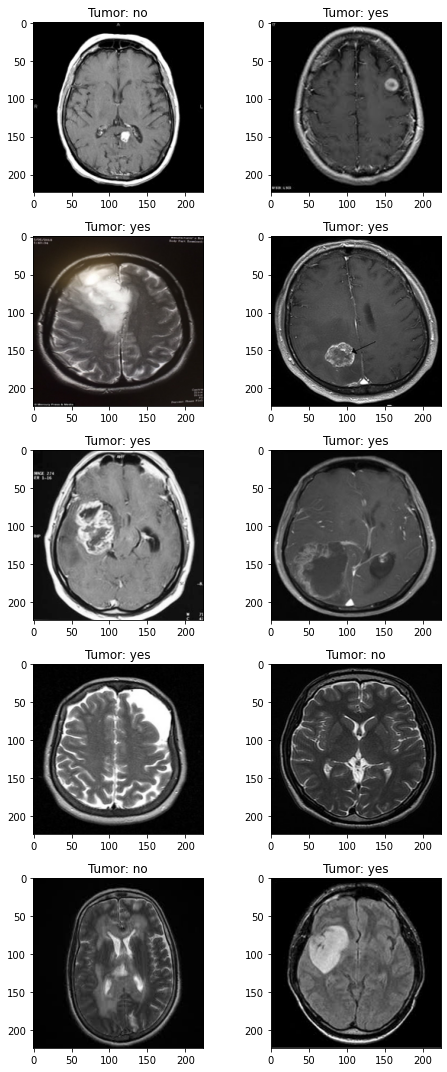

In [7]:
# Visualizing brain tumors

fig,ax=plt.subplots(5,2)
fig.set_size_inches(7,15)
for i in range(5):
    for j in range (2):
        l= np.random.randint(0,len(y_labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tumor: '+y_labels[l])
        
plt.tight_layout()

### 2. Discuss why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.

By building a predictive model trained from brain images, with and without tumors, people would be able to use that model to determine if a new brain image contains a tumor or not. This would benefit healthcare workers, technicians and patients. Human error  may play a roll in diagnosing brain tumors but using a predictive model like this can remove the human error. The model can also be improved with each additional brain image it is trained on. 

### Run at least three prediction models to try to predict brain tumor MRI images well.
- Use transfer learning for at least one of these models
- Discuss which models performed better and point out relevant hyper-parameter  values for successful models.

In [8]:
# Model 1: Vanilla Neural Network

model = Sequential()
model.add(Dense(64,  input_shape=(224, 224, 3), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid')) 

model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
7/7 [==============================] - 18s 3s/step - loss: 0.7320 - accuracy: 0.6337 - val_loss: 0.6575 - val_accuracy: 0.6667
Epoch 2/10
7/7 [==============================] - 17s 2s/step - loss: 0.5278 - accuracy: 0.7871 - val_loss: 0.7698 - val_accuracy: 0.5882
Epoch 3/10
7/7 [==============================] - 24s 3s/step - loss: 0.4766 - accuracy: 0.7871 - val_loss: 0.9714 - val_accuracy: 0.5294
Epoch 4/10
7/7 [==============================] - 17s 2s/step - loss: 0.5365 - accuracy: 0.7475 - val_loss: 0.8783 - val_accuracy: 0.5882
Epoch 5/10
7/7 [==============================] - 17s 2s/step - loss: 0.4545 - accuracy: 0.8168 - val_loss: 0.6196 - val_accuracy: 0.6275
Epoch 6/10
7/7 [==============================] - 18s 3s/step - loss: 0.3886 - accuracy: 0.8713 - val_loss: 0.6179 - val_accuracy: 0.6471
Epoch 7/10
7/7 [==============================] - 17s 2s/step - loss: 0.3476 - accuracy: 0.8812 - val_loss: 0.6810 - val_accuracy: 0.7059
Epoch 8/10
7/7 [==================

In model 1 above, I developed a vanilla neural network with no additional parameters. I'm using this as a baseline to see if models with additional parameters would perform better. I ran it over 10 epochs and it returned a val_accuracy score of .667 - a relatively high score for such a basic model.

In this, and all subsequent models, I used sigmoid activation and a binary crossentropy loss function because the output is 2. Other parameters which I use here and in all other models are relu activation on hidden layers and sgd optimization. 

In [9]:
# Model 2: NN with L2 penalization and dropout

model2 = Sequential()
model2.add(Dense(64, input_shape=(224, 224, 3), activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(.3))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(.3))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model2.add(Dropout(.3))
model2.add(Flatten())
model2.add(Dense(2, activation='sigmoid')) 

model2.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
7/7 [==============================] - 34s 5s/step - loss: 2.3297 - accuracy: 0.6188 - val_loss: 1.9950 - val_accuracy: 0.5294
Epoch 2/10
7/7 [==============================] - 34s 5s/step - loss: 1.8711 - accuracy: 0.7178 - val_loss: 1.9970 - val_accuracy: 0.5490
Epoch 3/10
7/7 [==============================] - 36s 5s/step - loss: 1.8373 - accuracy: 0.7426 - val_loss: 1.9891 - val_accuracy: 0.6275
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 1.7672 - accuracy: 0.8267 - val_loss: 1.9381 - val_accuracy: 0.7059
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 1.7107 - accuracy: 0.8812 - val_loss: 1.9340 - val_accuracy: 0.7255
Epoch 6/10
7/7 [==============================] - 34s 5s/step - loss: 1.7160 - accuracy: 0.8366 - val_loss: 2.2272 - val_accuracy: 0.5686
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 1.7019 - accuracy: 0.8465 - val_loss: 2.0768 - val_accuracy: 0.6275
Epoch 8/10
7/7 [==================

In model 2 above, I added L2 penalization and dropout regularization. As expected, it returned a slightly lower training set accuracy but significantly higher val_accuracy of .745. 

In [10]:
# Model 3: Convolutional NN with L2 penalization and dropout

model3 = Sequential()
model3.add(Conv2D(kernel_size=3, input_shape=[224, 224, 3], activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(MaxPooling2D(pool_size=2)),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(MaxPooling2D(pool_size=2)),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(MaxPooling2D(pool_size=2)),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Conv2D(kernel_size=3, activation='relu', filters=32, padding='same', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Flatten()),

model3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dropout(.3)),
model3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))),
model3.add(Dense(2, activation='sigmoid')),

model3.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy']),
model3.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
7/7 [==============================] - 44s 6s/step - loss: 4.8983 - accuracy: 0.5297 - val_loss: 4.8918 - val_accuracy: 0.5294
Epoch 2/10
7/7 [==============================] - 41s 6s/step - loss: 4.8504 - accuracy: 0.6238 - val_loss: 4.8792 - val_accuracy: 0.5294
Epoch 3/10
7/7 [==============================] - 42s 6s/step - loss: 4.8181 - accuracy: 0.6436 - val_loss: 4.8665 - val_accuracy: 0.5294
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 4.8065 - accuracy: 0.6337 - val_loss: 4.8542 - val_accuracy: 0.5294
Epoch 5/10
7/7 [==============================] - 42s 6s/step - loss: 4.7787 - accuracy: 0.6386 - val_loss: 4.8420 - val_accuracy: 0.5294
Epoch 6/10
7/7 [==============================] - 42s 6s/step - loss: 4.7763 - accuracy: 0.6436 - val_loss: 4.8293 - val_accuracy: 0.5294
Epoch 7/10
7/7 [==============================] - 42s 6s/step - loss: 4.7395 - accuracy: 0.6683 - val_loss: 4.8154 - val_accuracy: 0.5294
Epoch 8/10
7/7 [==================

In model 3 above, I developed a convolutional neural network with max pooling, L2 penalization, dropout regularization and two fully connected layers. It lowered the val_accuracy to .647. 

In [11]:
# Model 4: Inception model using transfer learning

inception_model = InceptionV3(input_shape = [224, 224, 3], include_top = False, weights = 'imagenet')
for layer in inception_model.layers:
  layer.trainable = False

model4_su = tf.keras.layers.Flatten()(inception_model.output)
model4_su = tf.keras.layers.Dense(64, activation = 'relu')(model4_su)
model4_su = tf.keras.layers.Dropout(.3)(model4_su)
model4_su = tf.keras.layers.Dense(2, activation = 'sigmoid')(model4_su)

model4 = Model(inception_model.input, model4_su)

# model4.add(Dense(64, activation = 'relu'))
# model4.add(Dropout(.3))
# model4.add(Dense(64, activation = 'relu'))
# model4.add(Dropout(.3))
# model4.add(Dense(64, activation = 'relu'))
# model4.add(Dropout(.3))
# model4.add(Dense(2, activation = 'sigmoid'))

model4.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model4.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
7/7 [==============================] - 23s 3s/step - loss: 1.4758 - accuracy: 0.6683 - val_loss: 0.7382 - val_accuracy: 0.5294
Epoch 2/10
7/7 [==============================] - 22s 3s/step - loss: 0.5822 - accuracy: 0.7129 - val_loss: 0.8028 - val_accuracy: 0.5294
Epoch 3/10
7/7 [==============================] - 22s 3s/step - loss: 0.4862 - accuracy: 0.7475 - val_loss: 0.6640 - val_accuracy: 0.6275
Epoch 4/10
7/7 [==============================] - 22s 3s/step - loss: 0.3960 - accuracy: 0.7822 - val_loss: 0.3940 - val_accuracy: 0.8431
Epoch 5/10
7/7 [==============================] - 23s 3s/step - loss: 0.3620 - accuracy: 0.7822 - val_loss: 0.5473 - val_accuracy: 0.6863
Epoch 6/10
7/7 [==============================] - 24s 3s/step - loss: 0.2819 - accuracy: 0.8614 - val_loss: 0.6744 - val_accuracy: 0.6863
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 0.2582 - accuracy: 0.8911 - val_loss: 0.3465 - val_accuracy: 0.8824
Epoch 8/10
7/7 [==================

In my fourth model, I used transfer learning to retrieve the trained parameters and weights from the inception learn model. Using this model, I increased the val_accuracy to .882.

My inception learn model is the most accurate model I've used yet. 

references: https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b

### Model Submission to Brain Tumor AI Model Share Leader Board 

In [12]:
# Pip installing model conversion libraries
! pip3 install keras2onnx
! pip3 install onnxruntime

In [14]:
# Model conversion
import os
os.environ['TF_KERAS'] = '1'
import onnx

onx = convert_keras(model4, 'my_model.onnx')
with open("my_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

Exception: ignored

In [19]:
def predict_classes(x):
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

raw_predictions=model4.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

# Getting labels
labels=pd.get_dummies(y_train).columns

# Printing labels
predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1
 1 1 0 0 0 0 1 1 1 1 1 0 0 0]
['no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [21]:
# Extracting evaluative metrics

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

# Extracting labels from y_test
y_test_labels=y_test.idxmax(axis=1) 

best_model_metrics = model_eval_metrics( y_test_labels,predicted_labels,classification="TRUE")
print (best_model_metrics)

   accuracy  f1_score  precision    recall  mse  rmse  mae  r2
0  0.882353  0.882308   0.883077  0.884259    0     0    0   0


In [22]:
# Installing AI Model Share libary
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.5.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.5-cp36-none-any.whl size=5305 sha256=f51531cb8997db3367e7986a46b595d7bd5a07bc2168659286b917c25aaa2b06
  Stored in directory: /root/.cache/pip/wheels/ab/28/ae/b9ecb7a3a5542d3f2fed56649fdd6dec1c16f900ef70b93875
Successfully built aimodelshare


In [0]:
apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = "Paarth_Malkan"
password = "Columbia1Temple1!"

model_filepath="my_model.onnx"   

model=model4

import pickle
aws_key_password_region = pickle.load( open( "braintumor_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [26]:
# Importing aimodelshare and submitting model

import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,modelobject=model,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata="default",preprocessor_filepath="default",preprocessor="default")

NameError: ignored

In [28]:
# Viewing Leaderboard

apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = "Paarth_Malkan"
password = "Columbia1Temple1!"

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression,model_config,model_optim_config,model_epochs
15,0.941176,0.940812,0.942547,0.939815,0,0,0,0,Taketo,17,1.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5
14,0.901961,0.901354,0.902950,0.900463,0,0,0,0,Taketo,16,2.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",10
16,0.875000,0.868718,0.868718,0.868718,0,0,0,0,3scman,18,3.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.01, 'decay...",25
21,0.862745,0.862745,0.865741,0.865741,0,0,0,0,dhoward97,24,4.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 1.5625e-05, ...",25
23,0.862745,0.862534,0.862308,0.863426,0,0,0,0,seanmcalevey,26,5.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",50
17,0.823529,0.813187,0.875000,0.812500,0,0,0,0,AlisaAi,19,5.333333,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",25
20,0.843137,0.841615,0.845611,0.840278,0,0,0,0,seanmcalevey,23,6.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",25
32,0.823529,0.791458,0.811776,0.779412,0,0,0,0,ccabelloe,41,8.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",25
31,0.823529,0.791458,0.811776,0.779412,0,0,0,0,ccabelloe,40,8.000000,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",25
30,0.803922,0.802019,0.805643,0.800926,0,0,0,0,XU,39,8.666667,1.0,backend: tensorflow\nclass_name: Sequential\nc...,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",5


In [0]:
# Importing and printing top model from leaderboard (didn't actually print it b/c the output is too long)

model_config= leaderboard.loc[15,'model_config'] # model details best model (i.e.-row #1)
model_optim_config= leaderboard.loc[15,'model_optim_config'] # model details best model (i.e.-row #1)

# print(model_config)        
# print(model_optim_config)

In [34]:
# Importing model configuration to fit to new data

from tensorflow.keras.models import model_from_yaml
lb_model = model_from_yaml(model_config)
lb_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 32,738
Non-trainable params: 21,774,144
_________________________________________________________________


The best model from the leadership's summary is above. It has almost 22 million parameters - about 33k of them are trainable. It uses an inception model with global average pooling and a dense layer. 

My best model's summary is below. It has over 25 million parameters - about 3.3 million of them are trainable. In my code for my best model (model4), I imported the inception model, which is fit with the training data. When I look at the summary of it below, it seems to use convolution layers. I didn't add any convolution layers into the code, though perhaps the model which I imported did. In addition, as according to the summary, it uses numerous other parameters such as batch normalization and max pooling (not to mention numerous layers). 

In [33]:
# My best model's summary

model4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [36]:
lb_model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
lb_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
7/7 [==============================] - 68s 10s/step - loss: 0.6948 - accuracy: 0.3762 - val_loss: 0.6928 - val_accuracy: 0.5294
Epoch 2/10
7/7 [==============================] - 65s 9s/step - loss: 0.6926 - accuracy: 0.5099 - val_loss: 0.6922 - val_accuracy: 0.5294
Epoch 3/10
7/7 [==============================] - 66s 9s/step - loss: 0.6892 - accuracy: 0.6337 - val_loss: 0.6919 - val_accuracy: 0.5294
Epoch 4/10
7/7 [==============================] - 66s 9s/step - loss: 0.6881 - accuracy: 0.6337 - val_loss: 0.6917 - val_accuracy: 0.5294
Epoch 5/10
7/7 [==============================] - 67s 10s/step - loss: 0.6845 - accuracy: 0.6337 - val_loss: 0.6916 - val_accuracy: 0.5294
Epoch 6/10
7/7 [==============================] - 66s 9s/step - loss: 0.6830 - accuracy: 0.6337 - val_loss: 0.6915 - val_accuracy: 0.5294
Epoch 7/10
7/7 [==============================] - 66s 9s/step - loss: 0.6812 - accuracy: 0.6337 - val_loss: 0.6915 - val_accuracy: 0.5294
Epoch 8/10
7/7 [================

Above I ran the imported model on the new data. Interestingly, the model far underperformed the leaderboard results, and returned the same val_accuracy of .5294 on every epoch. 

Link to public Github rep:
https://github.com/Paarthaenon/Adv.-ML-Public-Repo